<a href="https://colab.research.google.com/github/KondratovaLudmila/parking_system/blob/feature%2Focr/parking_system/numberplate_ukr/ocr_mods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Caracter Recognition OCR

In [50]:
import numpy as np
import pandas as pd
import json
import os

from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
# load data
images = glob("/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/img/*")
json_files = glob("/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/ann/*")
# image_folder = 'C:/Maryna/Python/Python - Data Science/Project materials/dataset/img'
# image_files = glob(os.path.join(image_folder, '*.png'))
# json_folder = 'C:/Maryna/Python/Python - Data Science/Project materials/dataset/ann'
# json_files = glob(os.path.join(json_folder, '*.json'))

In [58]:
# image ID = description
image_id = images[0].split('/')[-1].split('.')[0]
image_id

'00962BT_40841'

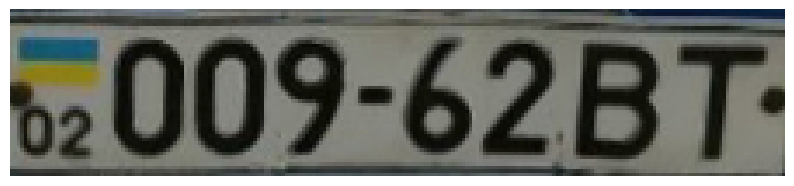

In [61]:
# Plot Example Images
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(images[0]))
ax.axis('off')
plt.show()

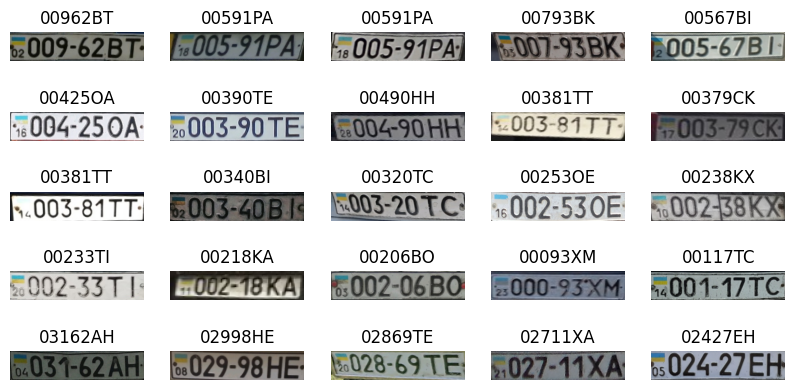

In [65]:
# Create a subplot with 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(10, 5))
axs = axs.flatten()

for i in range(25):
    # Read the image
    image_path = images[i]
    axs[i].imshow(plt.imread(image_path))
    axs[i].axis('off')

    # Extract the image_id (base name without extension)
    image_id = os.path.basename(image_path).rstrip('.png')

    # Find the corresponding JSON file
    json_path = f'/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/ann/{image_id}.json'

    # Read the JSON file and extract the "description"
    with open(json_path) as file:
        data = json.load(file)
        description = data['description']

    # Set the title to the description
    axs[i].set_title(f'{description}')

plt.show()


## Pytesseract

In [66]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (15.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [67]:
!pip install pytesseract

In [84]:
import pytesseract

In [86]:
# Example call
pytesseract.image_to_string(images[0], lang='eng')

' \n\n62 009-6\n\noO\n\n \n\n|\n\na\n\x0c'

In [70]:
pytesseract.image_to_string(Image.open(images[0]))

'\x0c'

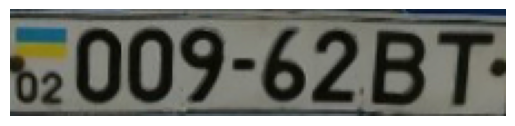

In [87]:
plt.imshow(plt.imread(images[0]))
plt.axis('off')
plt.show()

## Easy OCR

In [73]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [75]:
import easyocr

reader = easyocr.Reader(['uk'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [80]:
results = reader.readtext(images[0])#, detail = 0)

In [81]:
results

[([[0, 20], [28, 20], [28, 46], [0, 46]], '02', 0.99978733362636),
 ([[22, 2], [223, 2], [223, 48], [22, 48]], '009-62ВТ', 0.6065510080374482)]

In [82]:
pd.DataFrame(results, columns=['bbox','text','conf'])

bbox      text      conf
0    [[0, 20], [28, 20], [28, 46], [0, 46]]        02  0.999787
1  [[22, 2], [223, 2], [223, 48], [22, 48]]  009-62ВТ  0.606551

## Compare Easy OCR vs Pytesseract

In [114]:
# easyocr
reader = easyocr.Reader(['uk'], gpu = True)

dfs = []
for img in tqdm(images[:25]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

  0%|          | 0/25 [00:00<?, ?it/s]

In [89]:
import pytesseract
from PIL import Image
import cv2

dfs = []
for img_path in tqdm(images[:25]):
    # Load the image using PIL (Python Imaging Library)
    img = Image.open(img_path)

    # Use pytesseract to perform OCR on the image
    text = pytesseract.image_to_string(img)

    # Extract additional information if needed, such as bounding boxes
    # bbox = pytesseract.image_to_boxes(img)

    # Create a DataFrame to store the OCR results
    img_id = img_path.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame({'text': [text], 'img_id': [img_id]})

    # Append the DataFrame to the list
    dfs.append(img_df)

# Concatenate all DataFrames into a single DataFrame
pytesseract_df = pd.concat(dfs)

  0%|          | 0/25 [00:00<?, ?it/s]

### Plotting the Results: Easy OCR vs Pytesseract

In [99]:
def plot_compare(img_fn, easyocr_df, pytesseract_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # Plot EasyOCR results
    easy_results = easyocr_df.query('img_id == @img_id')['text'].values.tolist()
    img = cv2.imread(img_fn)
    for result in easy_results:
        cv2.putText(img, result, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('EasyOCR Results', fontsize=24)
    axs[0].axis('off')

    # Plot pytesseract results
    pytesseract_results = pytesseract_df.query('img_id == @img_id')['text'].values.tolist()
    img = cv2.imread(img_fn)
    for result in pytesseract_results:
        cv2.putText(img, result, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Pytesseract Results', fontsize=24)
    axs[1].axis('off')

    plt.show()

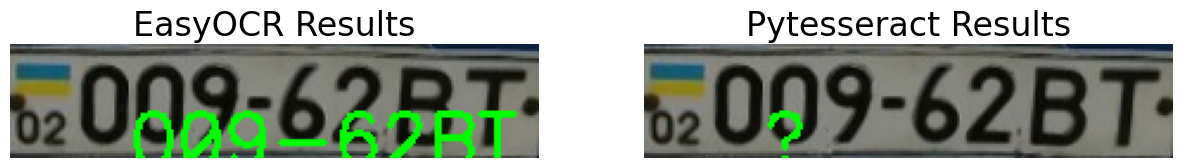

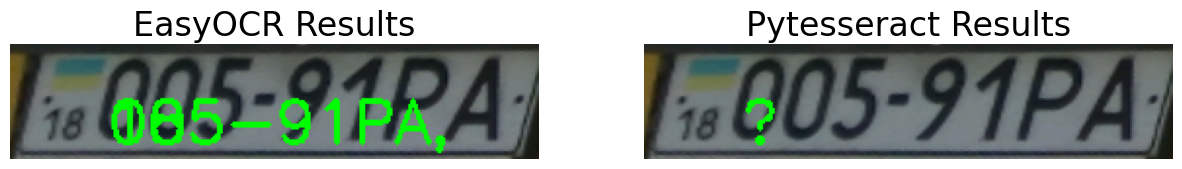

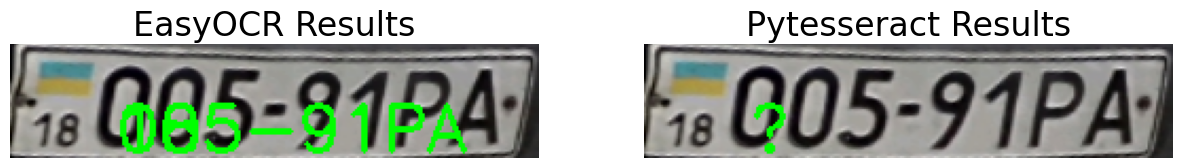

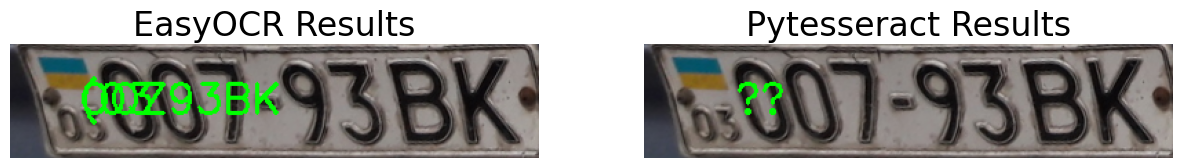

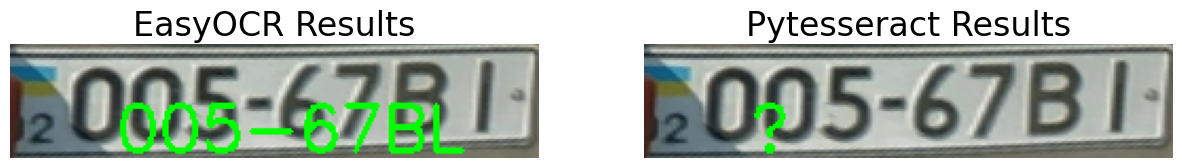

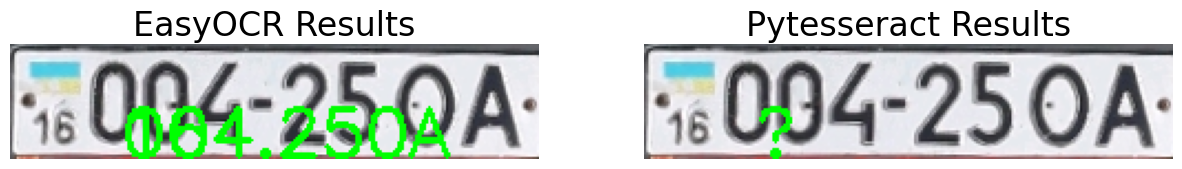

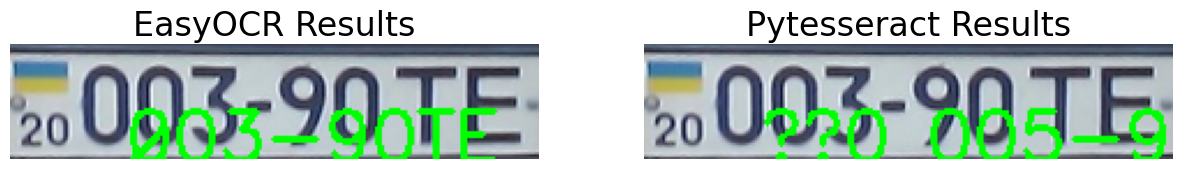

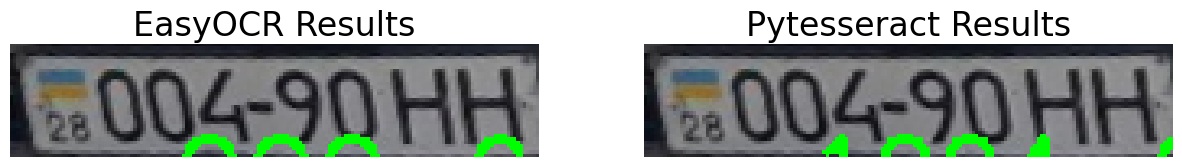

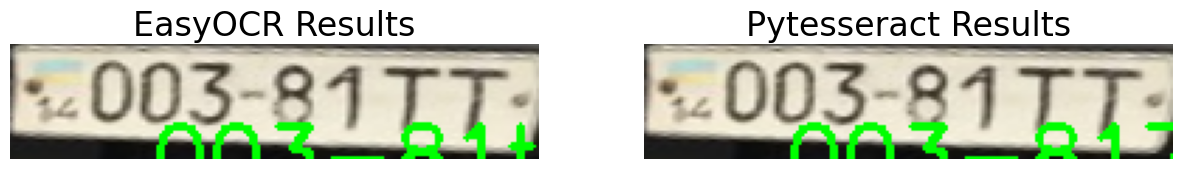

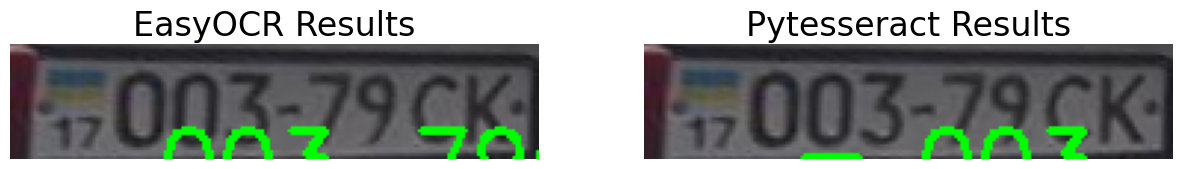

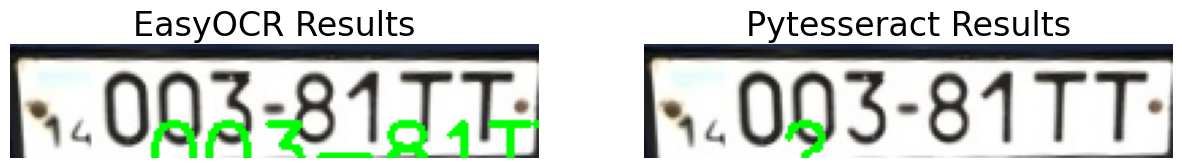

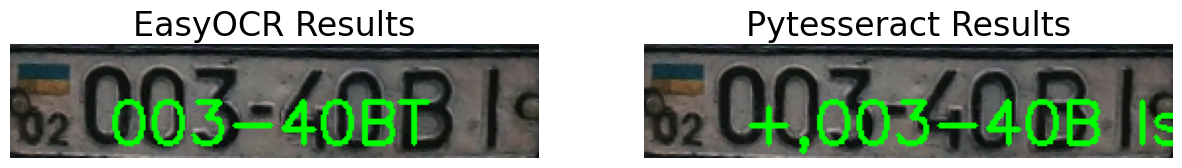

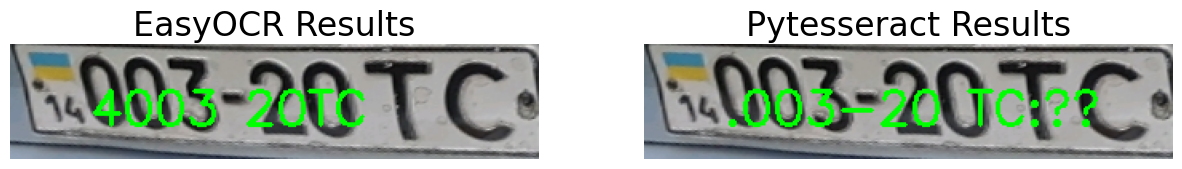

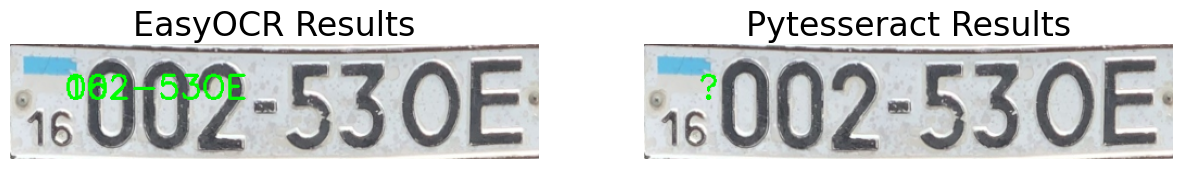

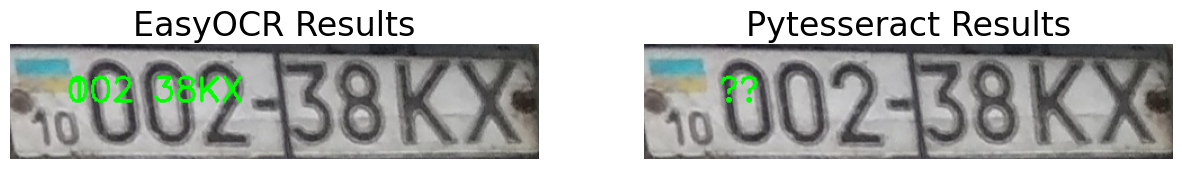

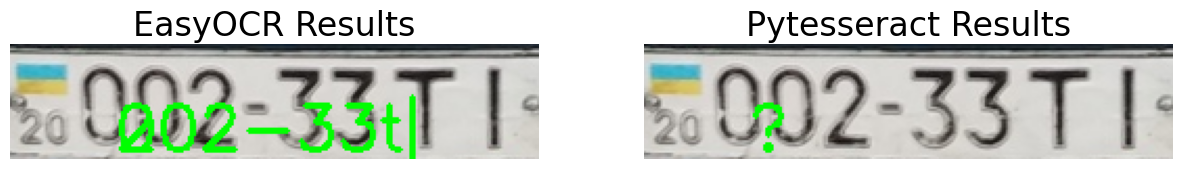

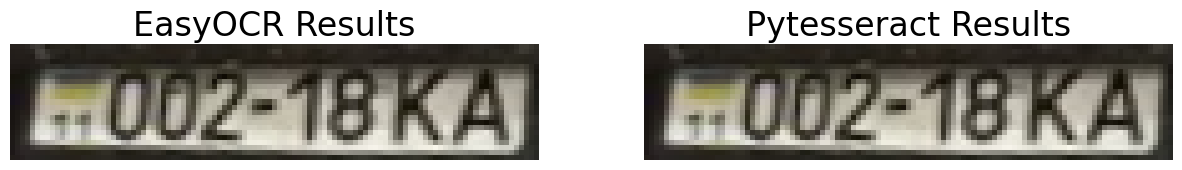

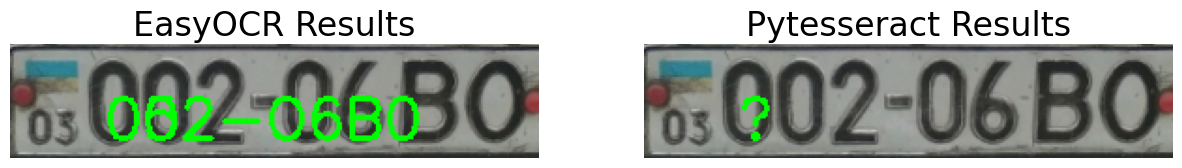

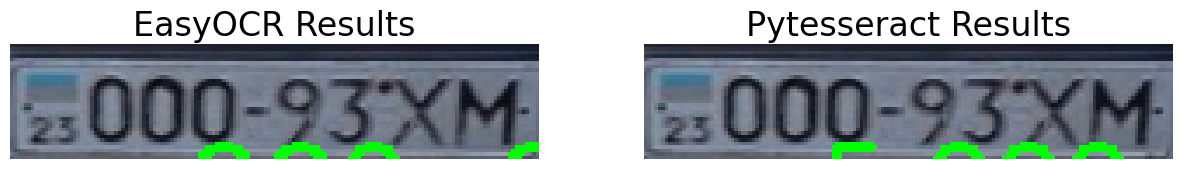

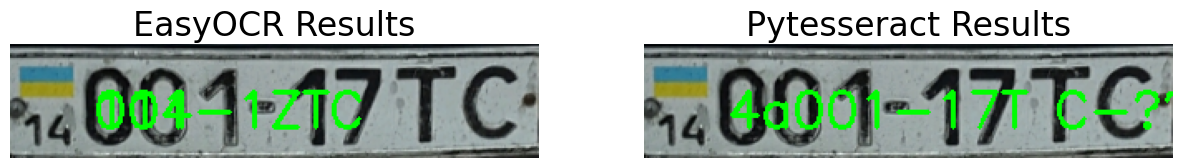

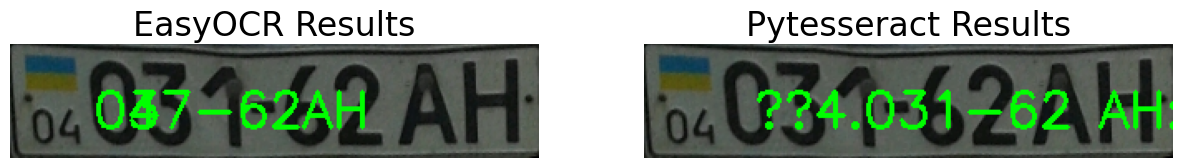

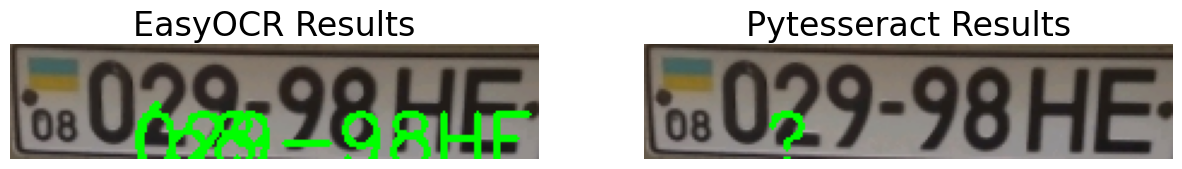

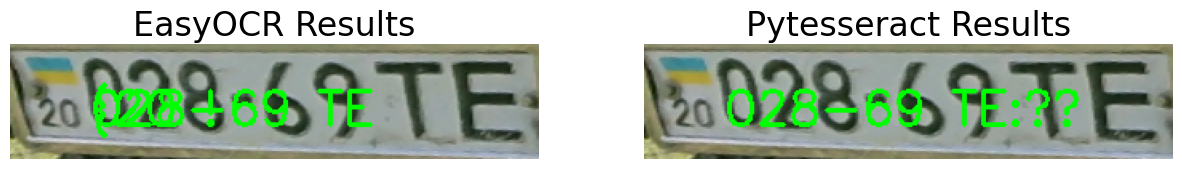

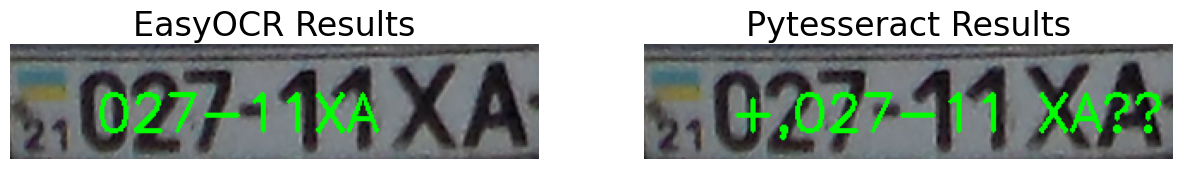

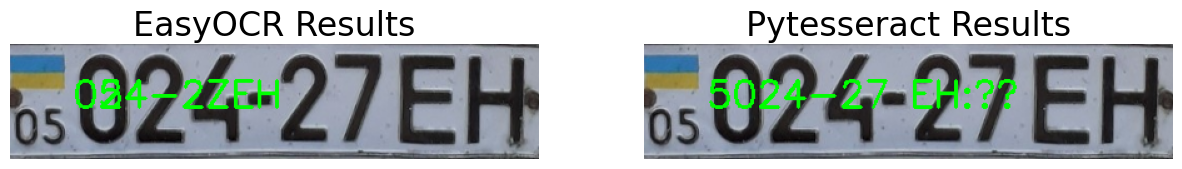

In [100]:
# Loop over results
for img_fn in images[:25]:
    plot_compare(img_fn, easyocr_df, pytesseract_df)

## Keras OCR

In [101]:
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-84sruh0o/keras-ocr_8d467638904349e6b84a9a1ea8973ef9
  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-84sruh0o/keras-ocr_8d467638904349e6b84a9a1ea8973ef9
  Resolved https://github.com/faustomorales/keras-ocr.git to commit e8d34a46f07d50158e1d86d6c617e99bfe99e2f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for keras-ocr: filename=keras_ocr-0.0.0-py3-none-any.whl size=42309 sha256=58f8de206f8c98fe2cba2027710331aace2fabad6f592b9373c9a0506a74161e
  Stored in directory: /tmp/pip-ephem-wheel-cache-vzve5jd1/wh

In [102]:
from IPython.display import clear_output
!pip install keras-ocr
# clear_output()

In [103]:
import keras_ocr

In [104]:
pipeline = keras_ocr.pipeline.Pipeline() #Creting a pipline
# kerasocr_preds = pipline.recognize(images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [105]:
results = pipeline.recognize([images[0]])

1/1 [==============================] - 3s 3s/step


In [106]:
results

[[('oo962bt',
   array([[ 29.110039 ,   5.5361643],
          [222.43274  ,   7.7841034],
          [221.97485  ,  47.162502 ],
          [ 28.652153 ,  44.914562 ]], dtype=float32)),
  ('02',
   array([[-6.735558e-16,  2.500000e+01],
          [ 2.600000e+01,  2.500000e+01],
          [ 2.600000e+01,  4.700000e+01],
          [ 0.000000e+00,  4.700000e+01]], dtype=float32))]]

In [107]:
pd.DataFrame(results[0], columns=['text','bbox'])

text                                               bbox
0  oo962bt  [[29.110039, 5.5361643], [222.43274, 7.7841034...
1       02  [[-6.735558e-16, 25.0], [26.0, 25.0], [26.0, 4...

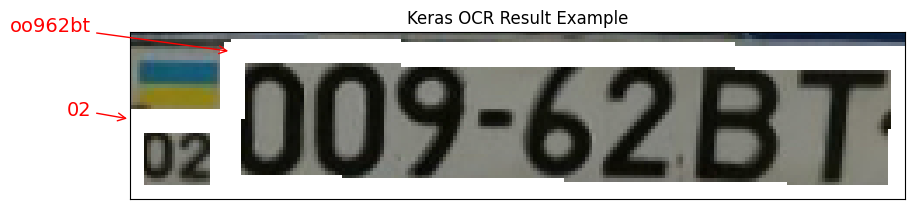

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(images[0]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

## Compare Easy OCR vs Keras OCR

In [111]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(images[:25]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 481ms/step


### Plotting the Results: Easy OCR vs Keras OCR

In [115]:
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

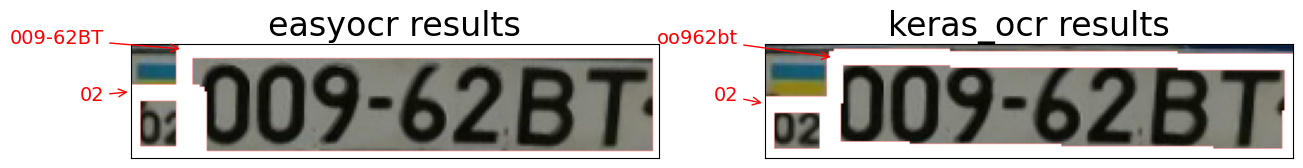

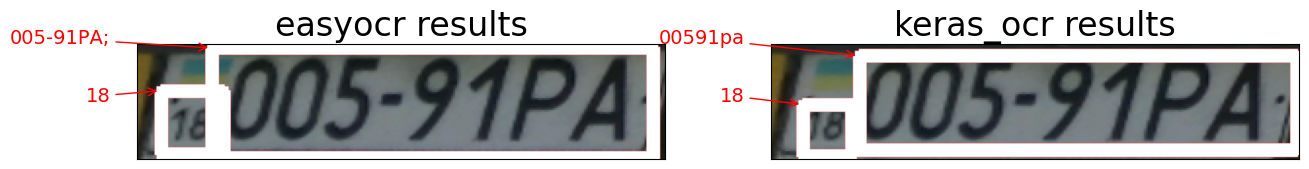

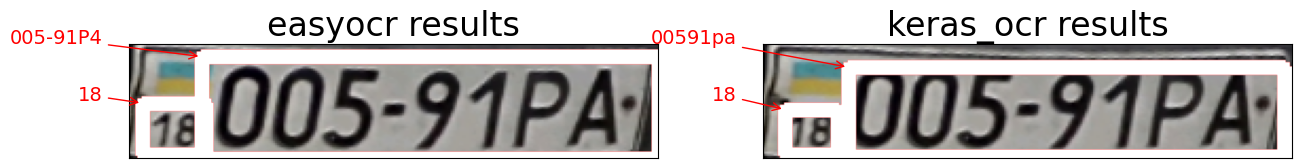

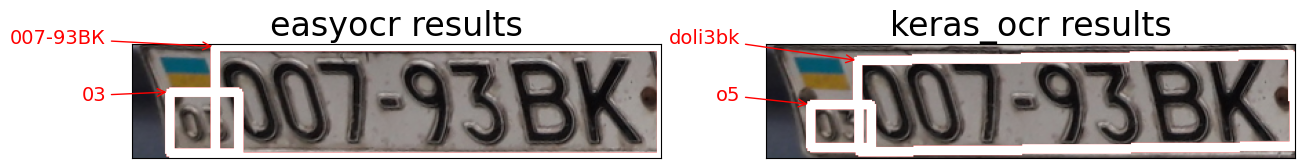

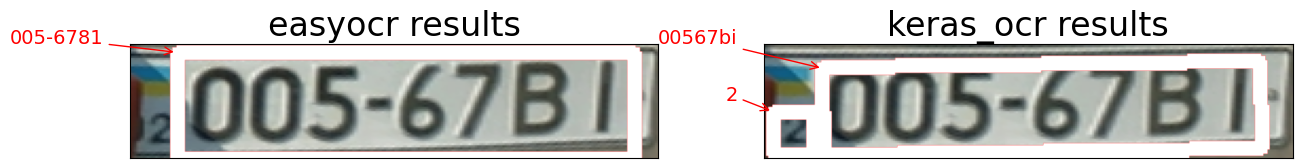

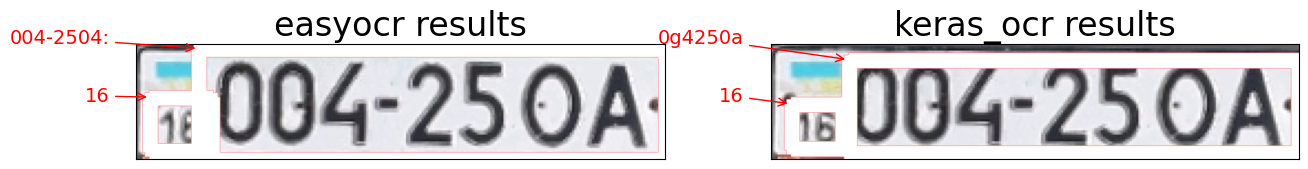

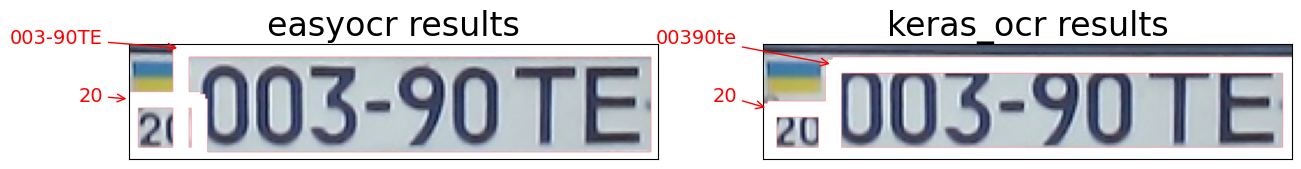

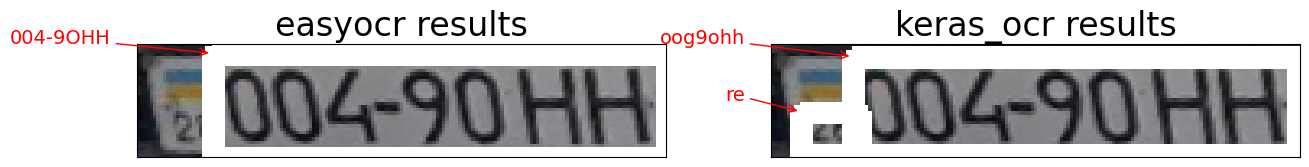

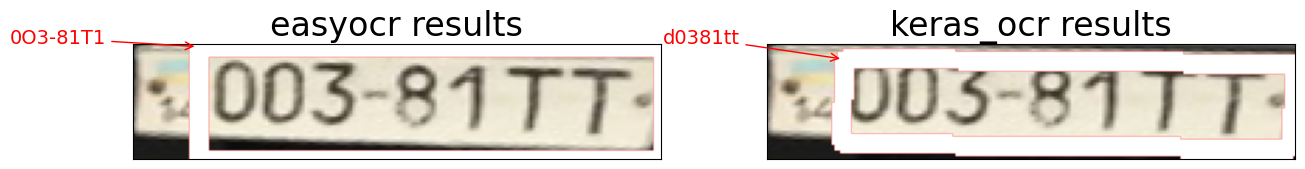

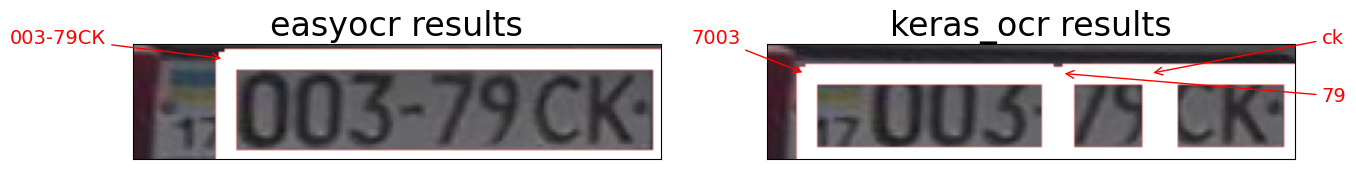

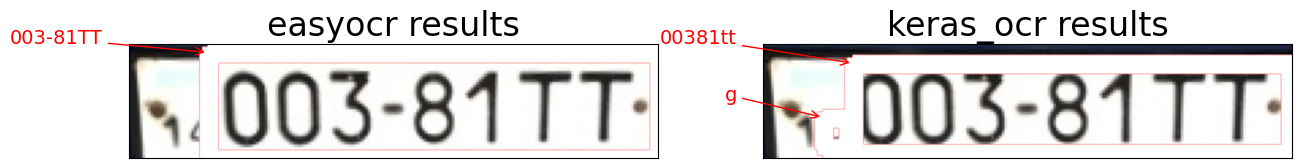

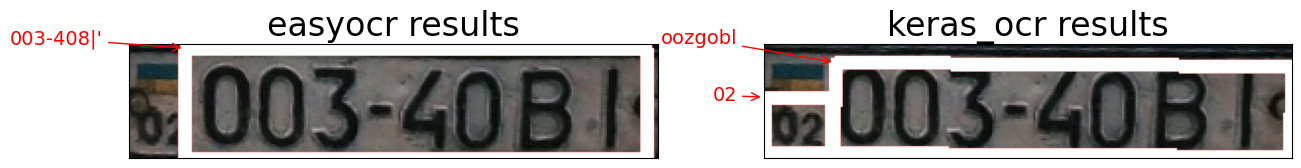

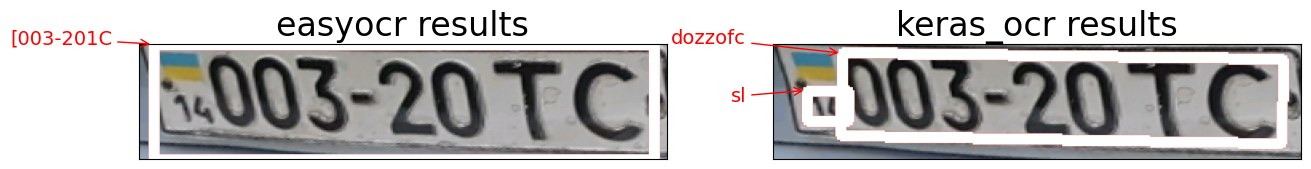

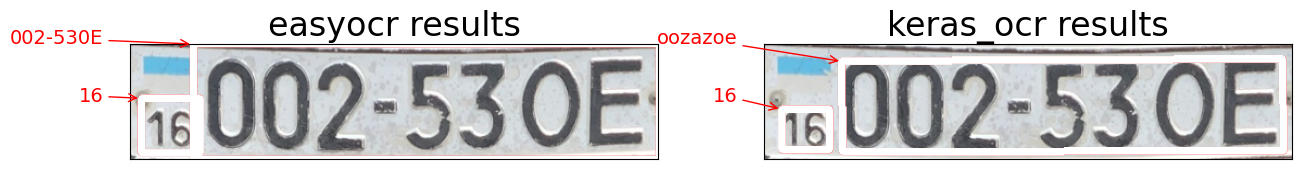

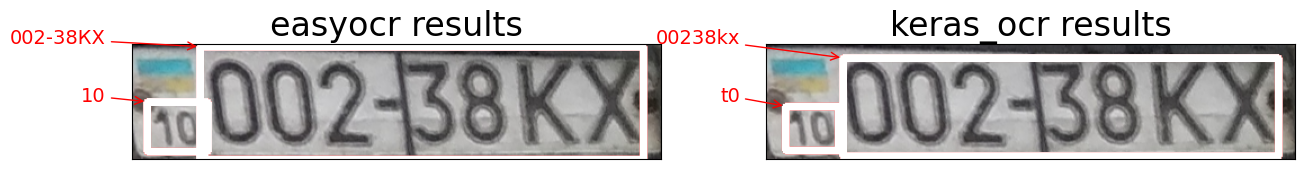

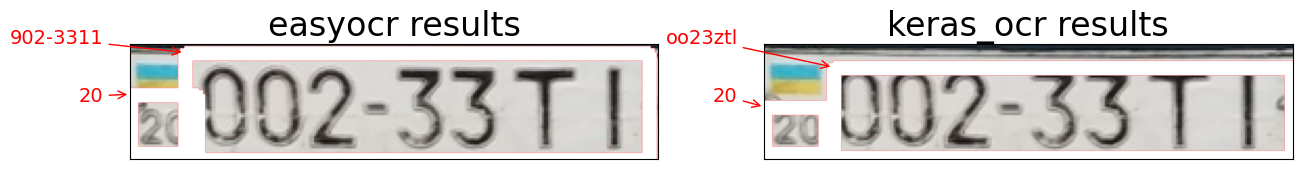

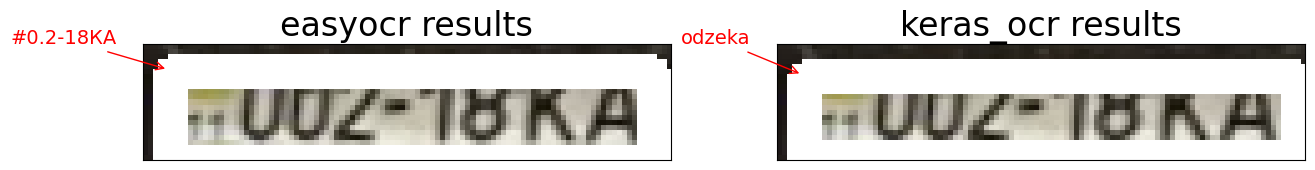

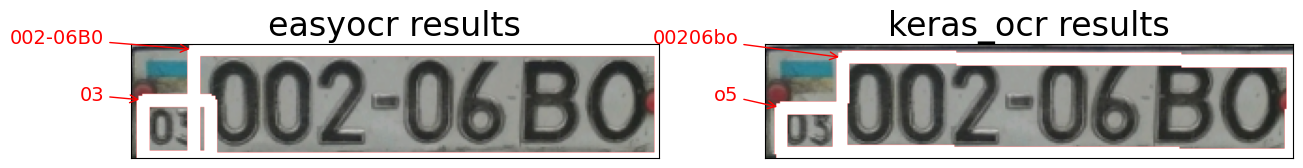

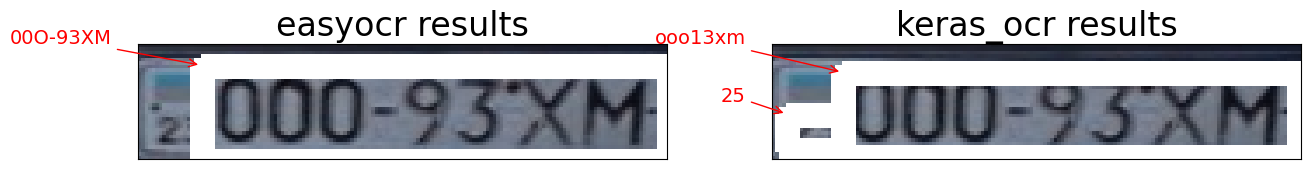

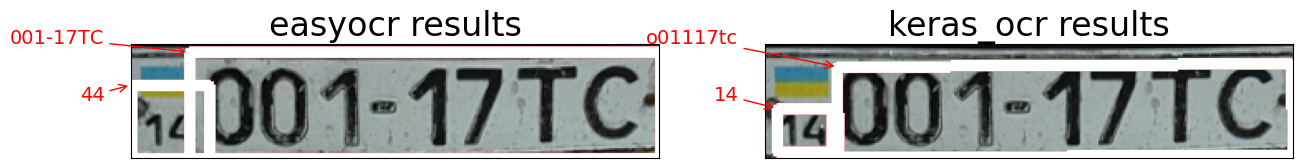

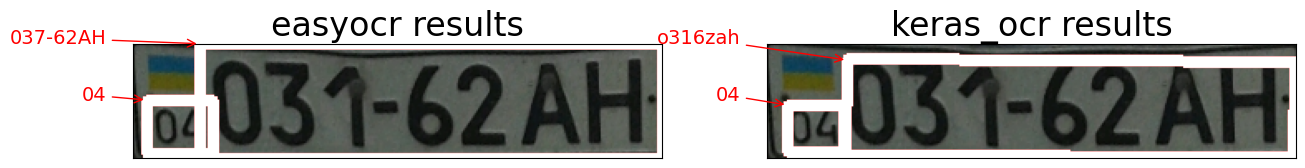

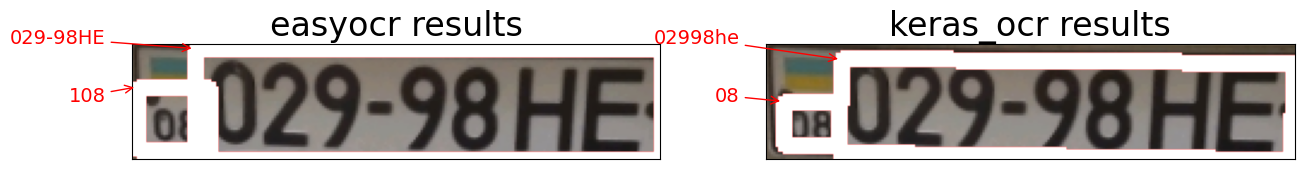

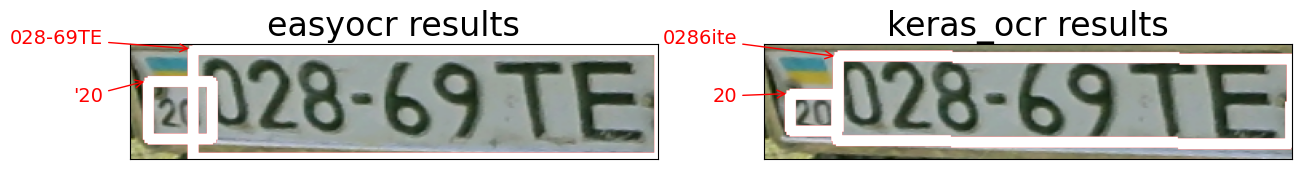

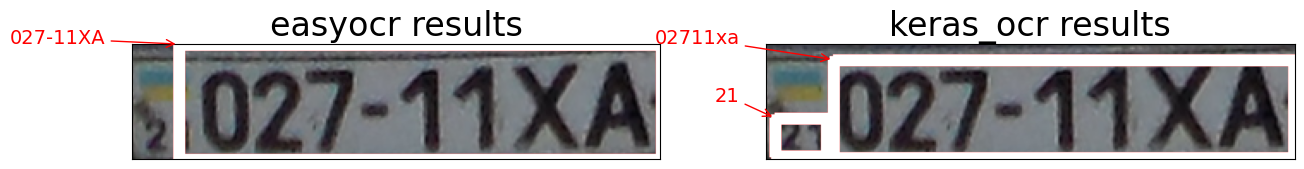

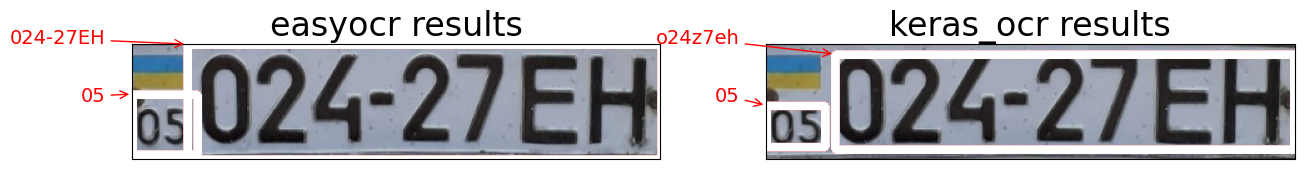

In [116]:
# Loop over results
for img_fn in images[:25]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)